# Lab 1: Introduction


# Lab Assignment: Implement Neural Network for XOR gate from scratch 


This lab was created by Prof. Schlizerman for AMATH563.

In [64]:
from numpy.linalg import multi_dot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
# XOR table

XOR_table = pd.read_csv('XOR_table.csv')
XOR_table

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


![](https://drive.google.com/uc?export=view&id=1lf82hKZxfBqhV2m5cLIRO_9pO1S3T4ty)

In [131]:
# XOR_table = XOR_table.values
X = XOR_table[:, :2]
targets = XOR_table[:, -1].reshape(-1,1)

print(X)      # Input data
print(targets) # Output targets

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


[[0.01355059]
 [0.98763246]
 [0.98763454]
 [0.01128244]]


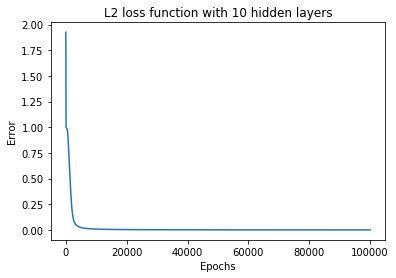

In [189]:

# number of hidden layers
n = 10 

# number of epochs
N = 100000 

# Define learning rate
learning_rate=0.1

# Define a hidden layer
W1= np.random.rand(2,n)

# Define an output layer
W2=np.random.rand(n,1)

# Define sigmoid activation function
a = lambda x : 1/(1+np.exp(-x))

# Define loss function
loss = lambda d,y : np.sum((d-y)**2)

lossArray = np.zeros(N)

for i in range(N):
    
  # Forward pass: compute predicted y
    z = a(np.dot(X,W1)) 
    y = a(np.dot(z,W2))

    # Compute loss
    l = loss(targets,y)

  # Backprop to compute gradients of w1 and w2 with respect to L2-norm loss
    gradW2 = z.T.dot(2*(y-targets)*y*(1-y))
    gradW1 = X.T.dot(((2*(y-targets)*y*(1-y)).dot(W2.T))*z*(1-z))
    
  # Update weights
    W2 -= gradW2*learning_rate
    W1 -= gradW1*learning_rate

  # Save loss to an array
    lossArray[i]=l
print(y)
plt.plot(lossArray)
plt.title("L2 loss function with 10 hidden layers")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()